## Machine learning for Public Policy
### HW1
#### Takuya Ando

### Problem1: Data Acquisition and Analysis

1. Download reported crime data from the Chicago open data portal for 2017 and 2018.

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import requests
import pandas as pd

In [15]:
# Download 2017 and 2018 data from the Chicago open data portal

url1 = "https://data.cityofchicago.org/api/views/d62x-nvdr/rows.csv?accessType=DOWNLOAD"
r1 = requests.get(url1)
with open('crime2017.csv', mode='w') as f1:
    f1.write(r1.text)

url2 = "https://data.cityofchicago.org/api/views/3i3m-jwuy/rows.csv?accessType=DOWNLOAD"
r2 = requests.get(url2)
with open('crime2018.csv', mode='w') as f2:
    f2.write(r2.text)

In [181]:
## Construct dataframe using downloaded CSV data 
crm17 = pd.read_csv("crime2017.csv")
crm18 = pd.read_csv("crime2018.csv")

2. Generate summary statistics for the crime reports data including but not limited to number of crimes of each type, how they changed over time, and how they are different by neighborhood. Please use a combination of tables and graphs to present these summary stats. 

The number of each crime type is as below. As we can see in both table and bar graph, theft is the most reported crime in both 2017 and 2018. Other major crimes include battery, criminal damage, assault and deceptive practice.

In [17]:
# Show number of each crime type in 2017 in table form
crm17_types = crm17.groupby('Primary Type')
num_crm17 = crm17_types.size()
num_crm17

Primary Type
ARSON                                  444
ASSAULT                              19303
BATTERY                              49214
BURGLARY                             13001
CONCEALED CARRY LICENSE VIOLATION       69
CRIM SEXUAL ASSAULT                   1628
CRIMINAL DAMAGE                      29042
CRIMINAL TRESPASS                     6812
DECEPTIVE PRACTICE                   19025
GAMBLING                               191
HOMICIDE                               676
HUMAN TRAFFICKING                        9
INTERFERENCE WITH PUBLIC OFFICER      1086
INTIMIDATION                           151
KIDNAPPING                             190
LIQUOR LAW VIOLATION                   191
MOTOR VEHICLE THEFT                  11406
NARCOTICS                            11658
NON-CRIMINAL                            38
NON-CRIMINAL (SUBJECT SPECIFIED)         2
OBSCENITY                               87
OFFENSE INVOLVING CHILDREN            2269
OTHER NARCOTIC VIOLATION                1

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

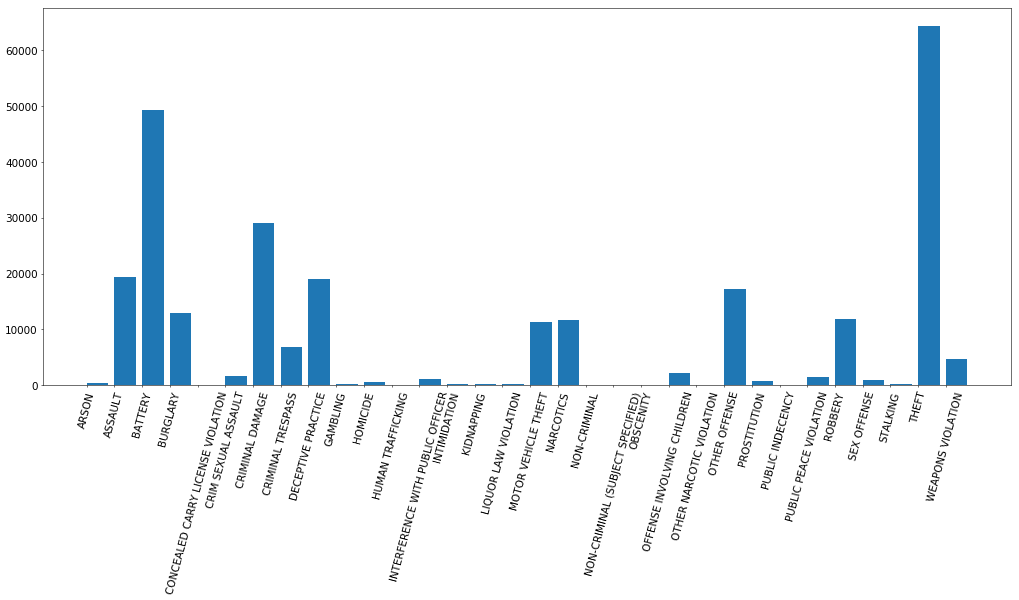

In [18]:
# Show number of each crime type in 2017 in bar chart form
left = np.linspace(0, 32, 32)
height17 = np.array(crm17_types.size())
label = num_crm17.index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height17, width=0.8, tick_label=label, align="edge")
plt.xticks(fontsize=15, rotation=75)
plt.yticks(fontsize=15)

In [19]:
# Show number of each crime type in 2018 in table form
crm18_types = crm18.groupby('Primary Type')
num_crm18 = crm18_types.size()
num_crm18

Primary Type
ARSON                                  372
ASSAULT                              20377
BATTERY                              49781
BURGLARY                             11729
CONCEALED CARRY LICENSE VIOLATION      149
CRIM SEXUAL ASSAULT                   1627
CRIMINAL DAMAGE                      27806
CRIMINAL TRESPASS                     6904
DECEPTIVE PRACTICE                   18716
GAMBLING                               201
HOMICIDE                               586
HUMAN TRAFFICKING                       14
INTERFERENCE WITH PUBLIC OFFICER      1305
INTIMIDATION                           168
KIDNAPPING                             169
LIQUOR LAW VIOLATION                   267
MOTOR VEHICLE THEFT                   9987
NARCOTICS                            12987
NON-CRIMINAL                            37
NON-CRIMINAL (SUBJECT SPECIFIED)         3
OBSCENITY                               86
OFFENSE INVOLVING CHILDREN            2230
OTHER NARCOTIC VIOLATION                 

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

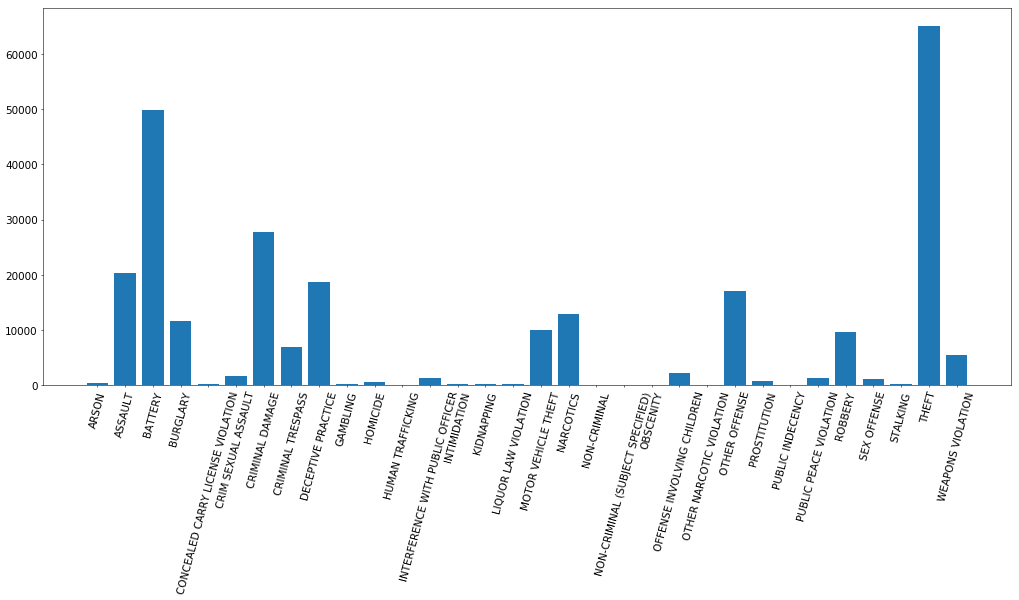

In [20]:
# Show number of each crime type in 2018 in bar chart form
left = np.linspace(0, 32, 32)
height18 = np.array(crm18_types.size())
label = num_crm18.index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height18, width=0.8, tick_label = label)
plt.xticks(fontsize=15, rotation=75)
plt.yticks(fontsize=15)

Then, I examined how the number of crime type changed over time. The bar chart below compares the number of each crime type in 2017 and 2018. To make comparison easy, they are shown in log scale. Overall, the number of crimes are very similar in both year. The main changes are, "Other narcotic vilolation" decreased significantly in 2018. On the other hand, some crimes such as "Concealed carry License Violation" and "Human trafficking" increased.

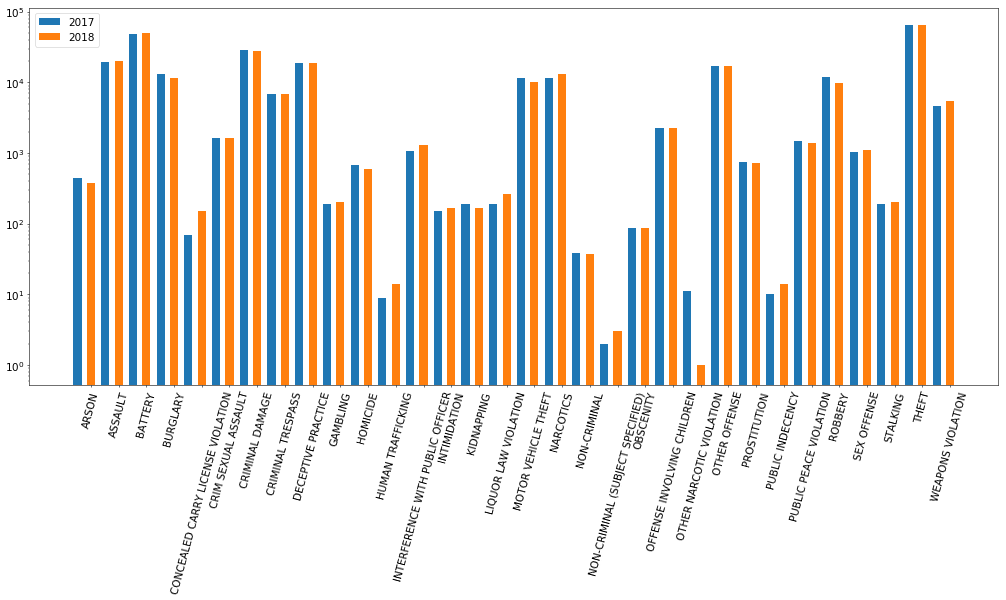

In [178]:
# Construct bar charts for 2017 and 2018
left1 =  np.linspace(0, 64, 32)
left2 =  np.linspace(1, 65, 32)
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left1, height17, width=0.6,label="2017", tick_label=label, log=True)
plt.bar(left2, height18, width=0.6,label="2018", tick_label=label, log=True)
plt.xticks(fontsize=15, rotation=75)
plt.yticks(fontsize=15)
plt.legend(loc=2, fontsize=15)

Then, the bar chart shows how the number of crimes varies by the community area.(neighborhood) Overall, it can be said that number of crimes is relatively small in north area(area number:1-7) and large in west(area number:23-26) and south(area number:66-71)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]), <a list of 10 Text yticklabel objects>)

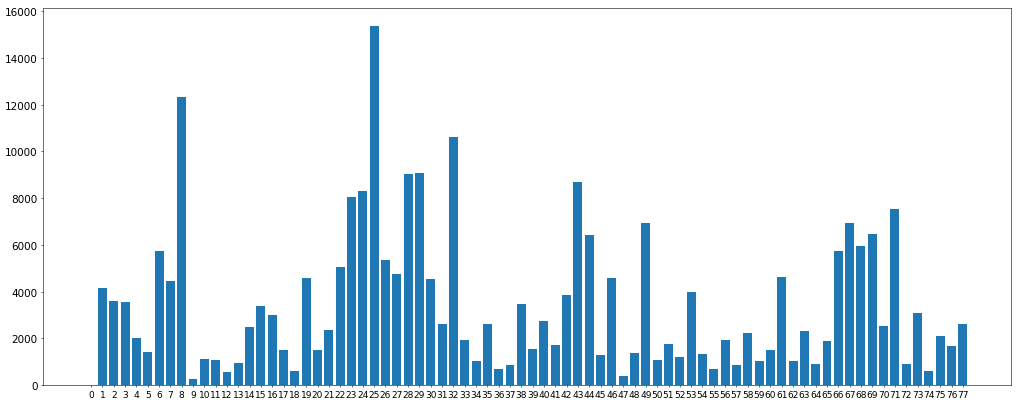

In [179]:
crm17_area = crm17.groupby("Community Area")
left = np.linspace(0, 78, 78)
height_area = np.array(crm17_area.size())
label = crm17_area.size().index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height_area, width=0.8, tick_label=label)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)

Based on the results above, we can compare the characteristics of crime types in three areas, that is, north, west and south. I choose 3 community areas for each area.(north, west and south) The three bar charts below show the number of crime types in each area.

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

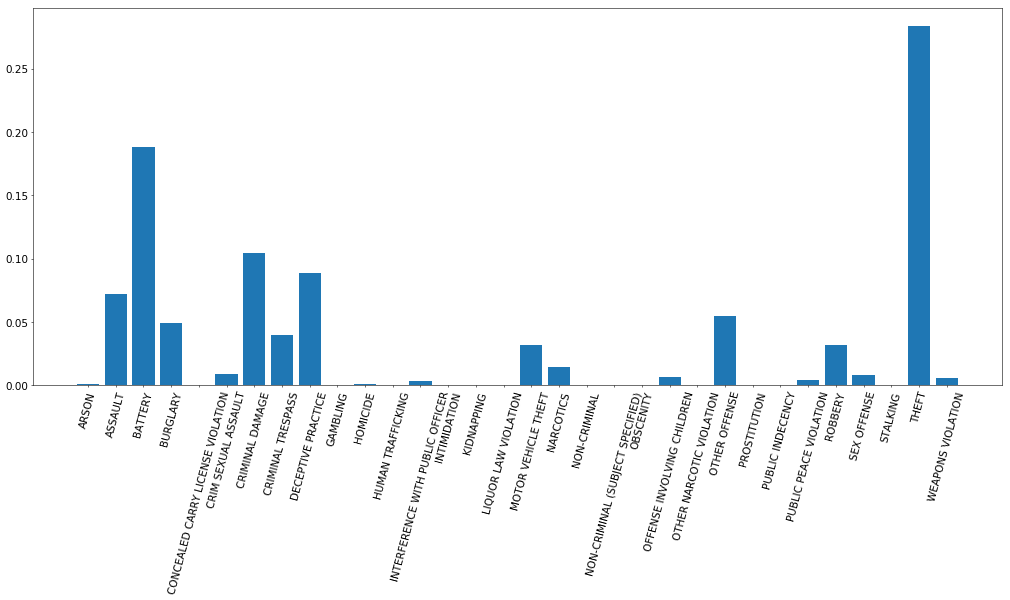

In [24]:
# Show the baar chart for north area
north18 = crm18[crm18['Community Area'].isin([1, 77, 3])]
north18_type = north18.groupby("Primary Type")
num_north18 = north18_type.size()
num_north18 = num_north18 / num_north18.sum()
types = crm18["Primary Type"].unique()
for type in types:
    if type not in num_north18.index:
        num_north18[type] = 0
num_north18.sort_index(inplace=True)
height_north = np.array(num_north18)
left = np.arange(len(height_north))
label = num_north18.index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height_north, width=0.8)
plt.xticks(left, label, fontsize=15, rotation=75)
plt.yticks(fontsize=15)

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225]), <a list of 10 Text yticklabel objects>)

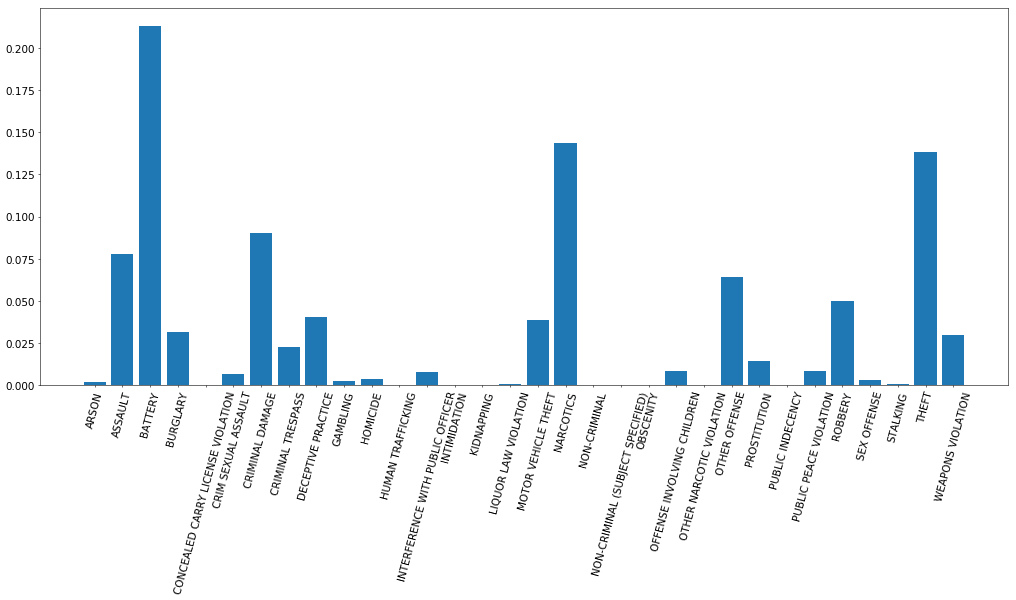

In [25]:
# Show the bar chart for west area
west18 = crm18[crm18['Community Area'].isin([23, 25, 26])]
west18_type = west18.groupby("Primary Type")
num_west18 = west18_type.size()
num_west18 = num_west18 / num_west18.sum()
types = crm18["Primary Type"].unique()
for type in types:
    if type not in num_west18.index:
        num_west18[type] = 0
num_west18.sort_index(inplace=True)
height_west = np.array(num_west18)
left = np.arange(len(height_west))
label = num_west18.index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height_west, width=0.8)
plt.xticks(left, label, fontsize=15, rotation=75)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

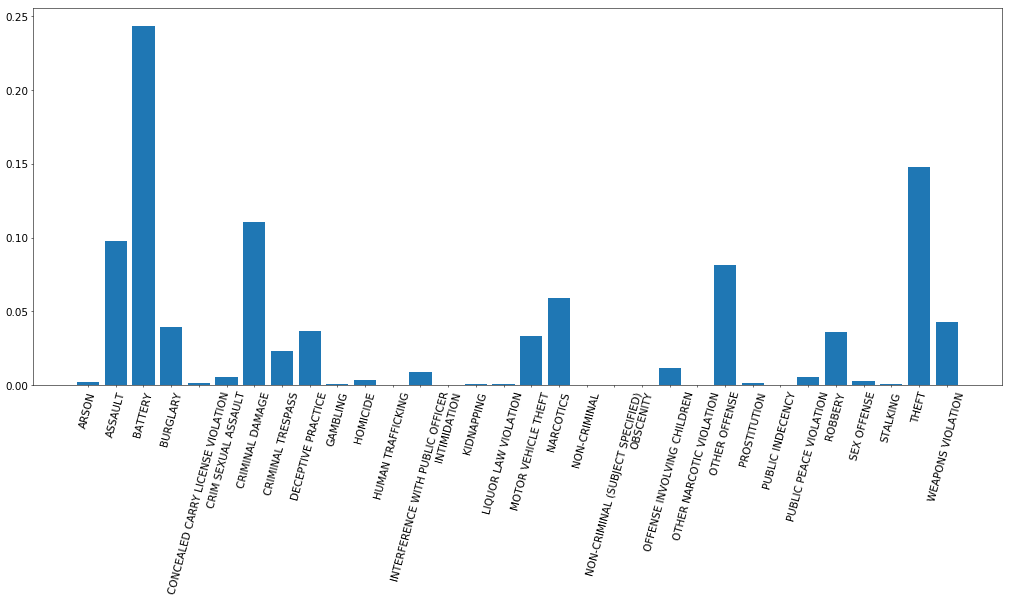

In [64]:
# Show the bar chart for south area
south18 = crm18[crm18['Community Area'].isin([67, 68, 69])]
south18_type = south18.groupby("Primary Type")
num_south18 = south18_type.size()
num_south18 = num_south18 / num_south18.sum()
types = crm18["Primary Type"].unique()
for type in types:
    if type not in num_south18.index:
        num_south18[type] = 0
num_south18.sort_index(inplace=True)
height_south = np.array(num_south18)
left = np.arange(len(height_south))
label = num_south18.index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height_south, width=0.8)
plt.xticks(left, label, fontsize=15, rotation=75)
plt.yticks(fontsize=15)

Finally, I compared the proportion of crimes in north, west and south areas. As we can see in the bar graph below, the overall tendency in the type of crime is similar in three areas, but there are some remarkable difference. For exanmple, in north area, theft is by far the most observed crime in 2018. Although theft also recorded high proportion in west and south area, battery recorded highest numbers in west and south. In addition, drug related crime(narcotics) is more frequent in west and south(especially in south) and deceptive practice is highest in north. From these facts, we can infer that in west and south area, violent or physical related crimes happens more frequently and, in north area, we are more likely to observe offeces against prorperties.

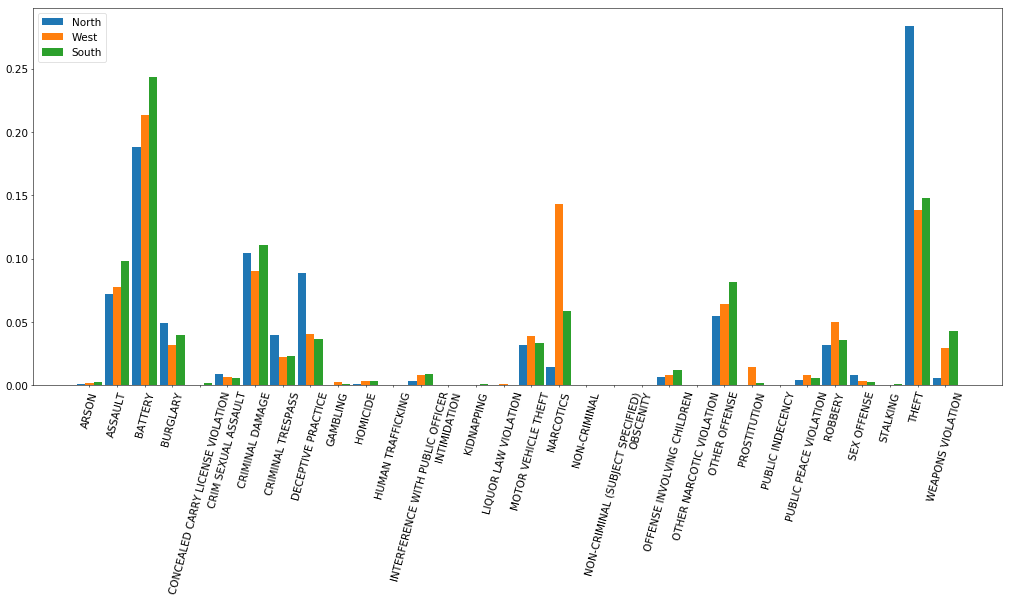

In [65]:
width = 0.3
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height_north,label="North", width=width)
plt.bar(left+width, height_west, label="West", width=width)
plt.bar(left+width*2, height_south, label="South", width=width)
plt.xticks(left+width, label, fontsize=15, rotation=75)
plt.yticks(fontsize=15)
plt.legend(loc=2, fontsize=15)

### Problem 2: Data Augmentation and APIs

#### Data augmentation 

For this task, I chose census tract area as the unit to examine.(I beleive it is very close to block group) In the cord chunks below, I got census tract id from Chicago Crime Portal and combined them with each crime report. 

In [168]:
# Create shapely objects using long and lat variables for crime report datas
import json
import geopandas as gpd
from shapely.geometry import Point
geom = crm17.apply(lambda x : Point([x['Longitude'],x['Latitude']]),axis=1)
crm17 = gpd.GeoDataFrame(crm17, geometry=geom) 
crm17.crs = {'init':'epsg:4326'}

geom = crm18.apply(lambda x : Point([x['Longitude'],x['Latitude']]),axis=1)
crm18 = gpd.GeoDataFrame(crm18, geometry=geom) 
crm18.crs = {'init':'epsg:4326'}

In [30]:
# Download census tract boundaries data from Chicago Crime Portal as shapely objects
geojson_file = "Boundaries_Census_Tracts_2010.geojson"
tracts = gpd.read_file(geojson_file)[["tractce10","geometry"]]
print (tracts.head())

  tractce10                                           geometry
0    842400  (POLYGON ((-87.62404799998049 41.7302169999839...
1    840300  (POLYGON ((-87.6860799999848 41.82295600001154...
2    841100  (POLYGON ((-87.62934700001182 41.8527970000265...
3    841200  (POLYGON ((-87.68813499997718 41.8556909999909...
4    839000  (POLYGON ((-87.63312200003458 41.8744880000269...


In [169]:
# Join crime reports data and census boundaries data with spatial join
crm17_tract = gpd.sjoin(crm17, tracts, op='within', how="left")
crm17_tract = crm17_tract.rename(columns = {"tractce10":"tract"})

crm18_tract = gpd.sjoin(crm18, tracts, op='within', how="left")
crm18_tract = crm18_tract.rename(columns = {"tractce10":"tract"})

C:\Users\tando\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


Then, I use Census API to get new datas for census tract areas. I chose race(proportion of black people), median faily size and median family income to examine the characteristics of the areas.

In [108]:
# Get median income data
from census import Census
from us import states
c = Census("dd717cee49171cfa4782bd80647735f97cc7a33f")
income = c.acs5.state_county_tract("B19013_001E", "17", '031', Census.ALL)
income_df = pd.io.json.json_normalize(income) # Convert to dataframe
income_df = income_df.rename(columns = {"B19013_001E":"med_inc"})
income_df = income_df.replace(-666666666.0, None)

In [109]:
# Get number of black people
num_blk = c.acs5.state_county_tract("B02001_003E", "17", '031', Census.ALL)
num_all = c.acs5.state_county_tract("B02001_001E", "17", '031', Census.ALL) # Get number of all races
num_blk_df = pd.io.json.json_normalize(num_blk) # Convert to dataframe and calculate the proportion of black people
num_blk_df = num_blk_df.rename(columns = {"B02001_003E":"num_blk"})
num_all_df = pd.io.json.json_normalize(num_all)
num_all_df = num_all_df.rename(columns = {"B02001_001E":"num_all"}) 
num_blk_df["per_blk"] = num_blk_df["num_blk"] / num_all_df["num_all"]
blk_df = num_blk_df

In [111]:
# Get average family size
family_size = c.acs5.state_county_tract("B25010_001E", "17", '031', Census.ALL)
family_size_df = pd.io.json.json_normalize(family_size) # Convert to dataframe
family_size_df = family_size_df.rename(columns = {"B25010_001E":"fam_size"}) 
family_size_df = family_size_df.replace(-666666666.0, None)

Finally, I conbined crime report data with new datas.

In [170]:
# Augment crime2017 data
crm17_tract_m1 = pd.merge(crm17_tract, family_size_df[["fam_size", "tract"]], on = "tract", how = "left")
crm17_tract_m2 = pd.merge(crm17_tract_m1, income_df[["med_inc", "tract"]], on = "tract", how = "left")
crm17_tract_m3 = pd.merge(crm17_tract_m2, blk_df[["per_blk", "tract"]], on = "tract", how = "left")
auged_crm17 = crm17_tract_m3

# Augment crime2018 data
crm18_tract_m1 = pd.merge(crm18_tract, family_size_df[["fam_size", "tract"]], on = "tract", how = "left")
crm18_tract_m2 = pd.merge(crm18_tract_m1, income_df[["med_inc", "tract"]], on = "tract", how = "left")
crm18_tract_m3 = pd.merge(crm18_tract_m2, blk_df[["per_blk", "tract"]], on = "tract", how = "left")
auged_crm18 = crm18_tract_m3

#### 1. What types of blocks have reports of "Battery"?

I examined what kind of blocks(census tract area) are likely to have "Battery" reports by constructing histograms for each added variable(family income, family size and percentage of black people). From the graphs below, it is clear that in low-income areas, there are more reports of battery. It is plausible that violent crime happens more frequently than in wealthy areas. Regarding black percentage, as I expected, highest number of battery was recorded in the area where most of the residents are black people. However, areas with very small number black people also recorded lots of batteries.

Text(0, 0.5, 'Number of Battery')

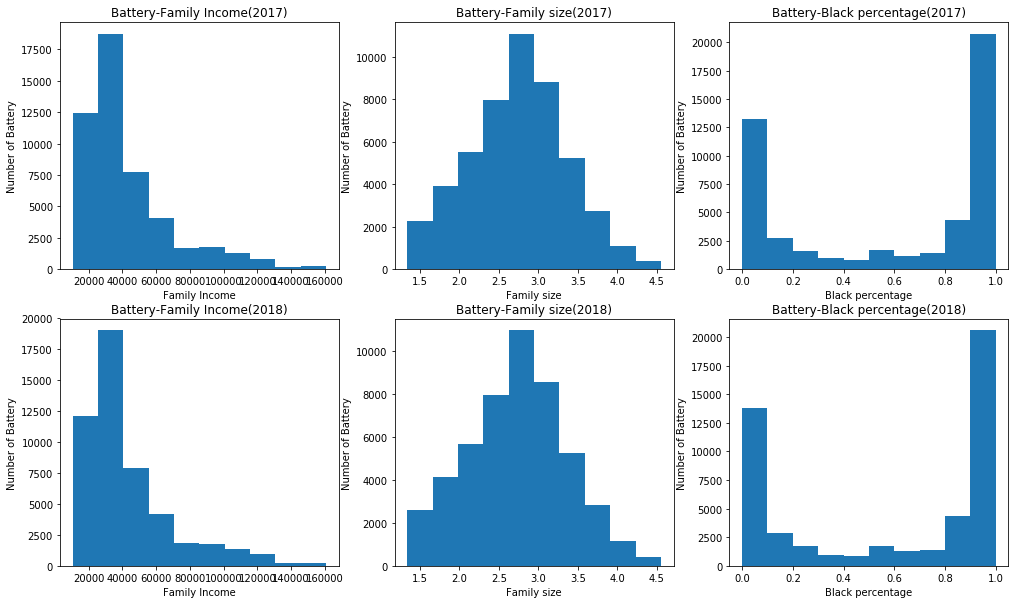

In [176]:
# Choose battery reports
battery = auged_crm17["Primary Type"] == "BATTERY"
crm17_btr = auged_crm17[battery]

battery = auged_crm18["Primary Type"] == "BATTERY"
crm18_btr = auged_crm18[battery]

# Construct histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10))
axes[0, 0].hist(crm17_btr["med_inc"], bins=10)
axes[0, 0].set_title('Battery-Family Income(2017)')
axes[0, 0].set_xlabel('Family Income')
axes[0, 0].set_ylabel('Number of Battery')

axes[0, 1].hist(crm17_btr["fam_size"], bins=10)
axes[0, 1].set_title('Battery-Family size(2017)')
axes[0, 1].set_xlabel('Family size')
axes[0, 1].set_ylabel('Number of Battery')

axes[0, 2].hist(crm17_btr["per_blk"], bins=10)
axes[0, 2].set_title('Battery-Black percentage(2017)')
axes[0, 2].set_xlabel('Black percentage')
axes[0, 2].set_ylabel('Number of Battery')

axes[1, 0].hist(crm18_btr["med_inc"], bins=10)
axes[1, 0].set_title('Battery-Family Income(2018)')
axes[1, 0].set_xlabel('Family Income')
axes[1, 0].set_ylabel('Number of Battery')

axes[1, 1].hist(crm18_btr["fam_size"], bins=10)
axes[1, 1].set_title('Battery-Family size(2018)')
axes[1, 1].set_xlabel('Family size')
axes[1, 1].set_ylabel('Number of Battery')

axes[1, 2].hist(crm18_btr["per_blk"], bins=10)
axes[1, 2].set_title('Battery-Black percentage(2018)')
axes[1, 2].set_xlabel('Black percentage')
axes[1, 2].set_ylabel('Number of Battery')

1. What types of blocks have reports of "Homicide"?

As we can see in the graphs below, the overall tendency is similar to battery. The main differences are that, first, the occurance of himicide more concentrate on low income areas. Besides, the tendency that homicide happens more likely in areas with high black-percentage is stronger than battery. 

Text(0, 0.5, 'Number of Homicide')

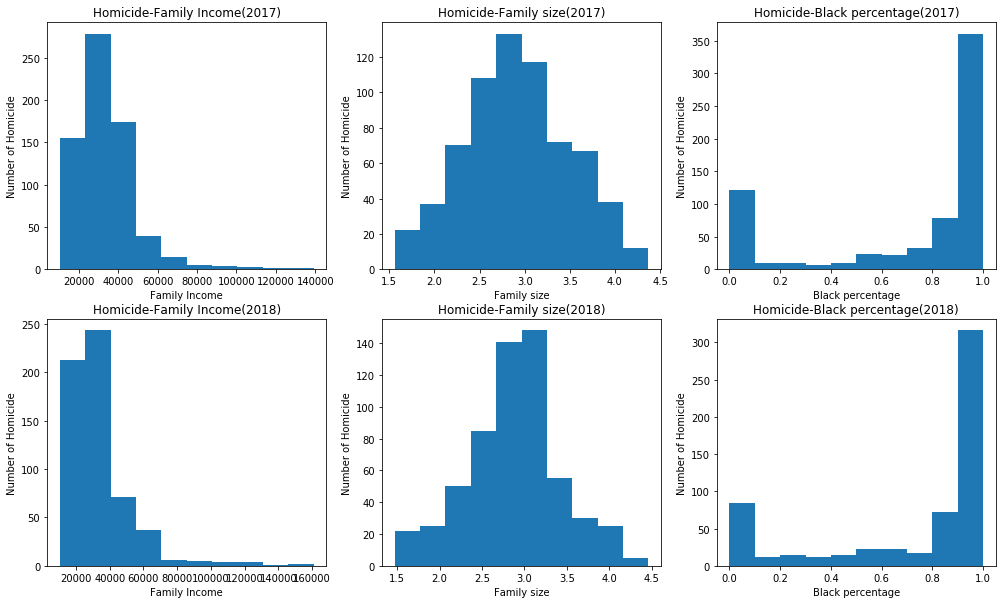

In [173]:
# Choose homicide reports
homicide = auged_crm17["Primary Type"] == "HOMICIDE"
crm17_hom = auged_crm17[homicide]

homicide = auged_crm18["Primary Type"] == "HOMICIDE"
crm18_hom = auged_crm18[homicide]

# Construct histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10))
axes[0,0].hist(crm17_hom["med_inc"], bins=10)
axes[0,0].set_title('Homicide-Family Income(2017)')
axes[0,0].set_xlabel('Family Income')
axes[0,0].set_ylabel('Number of Homicide')

axes[0,1].hist(crm17_hom["fam_size"], bins=10)
axes[0,1].set_title('Homicide-Family size(2017)')
axes[0,1].set_xlabel('Family size')
axes[0,1].set_ylabel('Number of Homicide')

axes[0,2].hist(crm17_hom["per_blk"], bins=10)
axes[0,2].set_title('Homicide-Black percentage(2017)')
axes[0,2].set_xlabel('Black percentage')
axes[0,2].set_ylabel('Number of Homicide')

axes[1,0].hist(crm18_hom["med_inc"], bins=10)
axes[1,0].set_title('Homicide-Family Income(2018)')
axes[1,0].set_xlabel('Family Income')
axes[1,0].set_ylabel('Number of Homicide')

axes[1,1].hist(crm18_hom["fam_size"], bins=10)
axes[1,1].set_title('Homicide-Family size(2018)')
axes[1,1].set_xlabel('Family size')
axes[1,1].set_ylabel('Number of Homicide')

axes[1,2].hist(crm18_hom["per_blk"], bins=10)
axes[1,2].set_title('Homicide-Black percentage(2018)')
axes[1,2].set_xlabel('Black percentage')
axes[1,2].set_ylabel('Number of Homicide')

Comparing histograms for deceptive practice and sexual offence, first, we can see that deceptive practice happens in areas with broader range of income than sex offence. It would be because deceptive practice happens in areas with larger numbers of people with insurance, and such areas would be relatively wealthier. Regarding family size, deceptive practice are relatively reported in areas with small sized family compared to sex offence. Both crimes show similar tendency for black percentage, although homicide is a little highly reported in areas with high percentage of black people.

Text(0, 0.5, 'Number of Sex Offence')

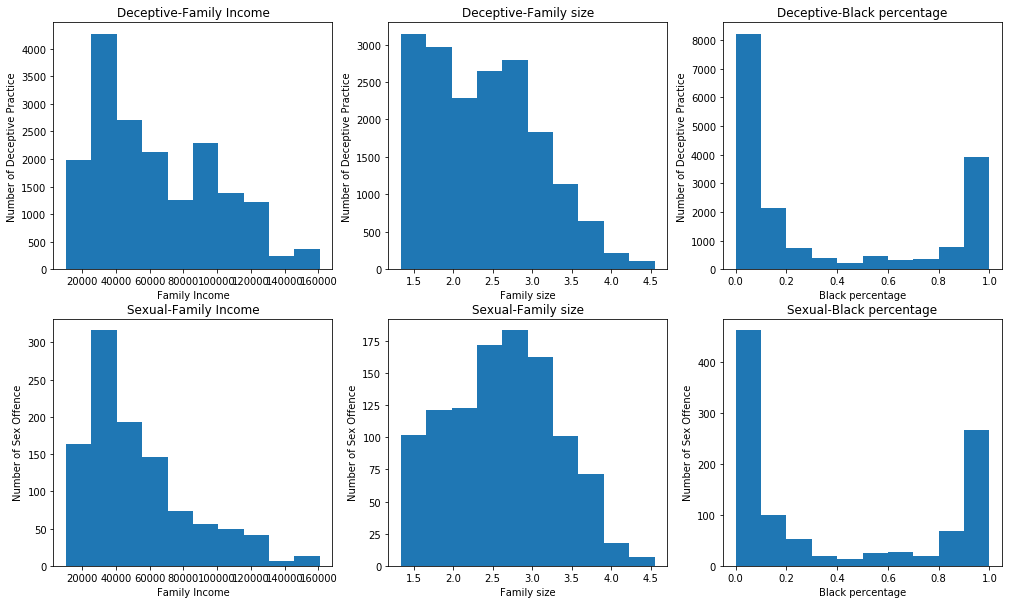

In [175]:
# Choose deceprive practice and sex offence reports
deceptive = auged_crm18["Primary Type"] == "DECEPTIVE PRACTICE"
crm18_dec = auged_crm18[deceptive]

sexual = auged_crm18["Primary Type"] == "SEX OFFENSE"
crm18_sex = auged_crm18[sexual]

# Construct histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10))
axes[0,0].hist(crm18_dec["med_inc"], bins=10)
axes[0,0].set_title('Deceptive-Family Income')
axes[0,0].set_xlabel('Family Income')
axes[0,0].set_ylabel('Number of Deceptive Practice')

axes[0,1].hist(crm18_dec["fam_size"], bins=10)
axes[0,1].set_title('Deceptive-Family size')
axes[0,1].set_xlabel('Family size')
axes[0,1].set_ylabel('Number of Deceptive Practice')

axes[0,2].hist(crm18_dec["per_blk"], bins=10)
axes[0,2].set_title('Deceptive-Black percentage')
axes[0,2].set_xlabel('Black percentage')
axes[0,2].set_ylabel('Number of Deceptive Practice')

axes[1,0].hist(crm18_sex["med_inc"], bins=10)
axes[1,0].set_title('Sexual-Family Income')
axes[1,0].set_xlabel('Family Income')
axes[1,0].set_ylabel('Number of Sex Offence')

axes[1,1].hist(crm18_sex["fam_size"], bins=10)
axes[1,1].set_title('Sexual-Family size')
axes[1,1].set_xlabel('Family size')
axes[1,1].set_ylabel('Number of Sex Offence')

axes[1,2].hist(crm18_sex["per_blk"], bins=10)
axes[1,2].set_title('Sexual-Black percentage')
axes[1,2].set_xlabel('Black percentage')
axes[1,2].set_ylabel('Number of Sex Offence')

### Problem 3

#### Problem3-1 Describe how crime has changed in Chicago from 2017 to 2018

From the bar chart in problem1 that compares the number of each crime type in 2017 and 2018, there is not significant difference with the time change, excluding a kind of narcotic vaiolation. When taking a closer look with some characteristics of the area where crime was reported, although battery shows same tendency in both year, homicide happend more in lowest income area in 2018 than in 2017. From this fact, there might be a possiblity that, in poor area, the risk of serious crime increased in two years.

#### Problem3-2 A Are these statistics correct?

At first, we will choose crime reports only in period between July 1st and July 26th for both 2017 and 2018.

In [182]:
# Convert date variable to datetime object
import datetime
split = lambda x: x.split()
crm17["Date"] = crm17["Date"].map(split)
pop = lambda x: x.pop(0)
crm17["Date"] = crm17["Date"].map(pop)
date = lambda x: datetime.datetime.strptime(x, '%m/%d/%Y') # 
crm17["Date"] = crm17["Date"].map(date)
# Choose data which was reported between July 1st and July 26th
start_date = datetime.datetime.strptime("07/01/2017", '%m/%d/%Y')
end_date = datetime.datetime.strptime("07/26/2017", '%m/%d/%Y')
filter1 = crm17["Date"] >= start_date 
filter2 = crm17["Date"] <= end_date
crm17_jul = crm17[filter1][filter2]

crm18["Date"] = crm18["Date"].map(split)
crm18["Date"] = crm18["Date"].map(pop)
crm18["Date"] = crm18["Date"].map(date)
start_date = datetime.datetime.strptime("07/01/2018", '%m/%d/%Y')
end_date = datetime.datetime.strptime("07/26/2018", '%m/%d/%Y')
filter1 = crm18["Date"] >= start_date
filter2 = crm18["Date"] <= end_date
crm18_jul = crm18[filter1][filter2]

C:\Users\tando\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\tando\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [152]:
crm17_jul_type = crm17_jul.groupby("Primary Type")
num_17 = crm17_jul_type.size()
num_17

Primary Type
ARSON                                  31
ASSAULT                              1531
BATTERY                              3903
BURGLARY                             1025
CONCEALED CARRY LICENSE VIOLATION       5
CRIM SEXUAL ASSAULT                   124
CRIMINAL DAMAGE                      2302
CRIMINAL TRESPASS                     522
DECEPTIVE PRACTICE                   1354
GAMBLING                               15
HOMICIDE                               64
INTERFERENCE WITH PUBLIC OFFICER       91
INTIMIDATION                           12
KIDNAPPING                             19
LIQUOR LAW VIOLATION                   22
MOTOR VEHICLE THEFT                   822
NARCOTICS                             852
NON-CRIMINAL                            3
OBSCENITY                               6
OFFENSE INVOLVING CHILDREN            137
OTHER NARCOTIC VIOLATION                2
OTHER OFFENSE                        1277
PROSTITUTION                           52
PUBLIC PEACE VIOLATIO

In [184]:
crm18_jul_type = crm18_jul.groupby("Primary Type")
num_18 = crm18_jul_type.size()
num_18

Primary Type
ARSON                                  33
ASSAULT                              1646
BATTERY                              4150
BURGLARY                              962
CONCEALED CARRY LICENSE VIOLATION      11
CRIM SEXUAL ASSAULT                   129
CRIMINAL DAMAGE                      2267
CRIMINAL TRESPASS                     494
DECEPTIVE PRACTICE                   1399
GAMBLING                               38
HOMICIDE                               50
INTERFERENCE WITH PUBLIC OFFICER      111
INTIMIDATION                           17
KIDNAPPING                             11
LIQUOR LAW VIOLATION                   28
MOTOR VEHICLE THEFT                   708
NARCOTICS                             985
NON-CRIMINAL                            3
NON-CRIMINAL (SUBJECT SPECIFIED)        1
OBSCENITY                               8
OFFENSE INVOLVING CHILDREN            145
OTHER OFFENSE                        1315
PROSTITUTION                           32
PUBLIC INDECENCY     

Then, as we can see below, number of crimes in the specifed period decreased other than battery. In addition, total number of crimes increased but by only around 2 percent. Therefore, the statistics in the article are not correct.

In [157]:
crime_lst = ["ROBBERY", "BATTERY", "BURGLARY", "MOTOR VEHICLE THEFT"]
for crime in crime_lst:
    print(crime + " in 2018: " + str((num_18[crime] / num_17[crime])*100) + " percent of 2017")
print("Total crime number in 2018: " + str(num_18.sum()*100 / num_17.sum()) +" percent of 2017")

ROBBERY in 2018: 88.00475059382423 percent of 2017
BATTERY in 2018: 106.32846528311555 percent of 2017
BURGLARY in 2018: 93.85365853658536 percent of 2017
MOTOR VEHICLE THEFT in 2018: 86.13138686131386 percent of 2017
Total crime number in 2018: 101.6914032382421 percent of 2017


#### Problem3-2 B Could they be misleading or would you agree with the conclusions he's drawing?

I think they are totally misleading. It exaggerates the seriousness of criminal situation in Chicago with incorrect information. It might cause unnecessary anxiety in society and would lead to wrong allocation of resources for social security.

#### Problem 3-3 Provide 5 key findings to the new mayor's office about crime in Chicago and what they should focus on in order to deal with crime in Chicago.

Key findings are;
1. The total crime number is stable in these two years.(From the analysis above)

2. In west and south area, violent or physical crimes are more likely to happen and in north area, crimes against properties are more likely to happen than other areas.(From the analysis in problem1 and problem2)

3. Some crimes against body or life(like battery and sexual offense) are more likely to happen in low income area and areas with high proportion of black people. 

4. Deceptive practice happens frequently in areas with small average family sizes(1 or 2). We may infer that people living alone or with few people cannot consult with others and tend to be deceived easily. 

5. There might be a possiblity that, in poor area, the risk of serious crime such as homicide increased in two years.(From the analysis in problem2)

Recommendations;

We found that pyhsical or violent crimes are highly recorded in poorer areas and the risk of serious crimes like homicide might increase in such areas. In those areas, the proportion of black people are high, and that means segregation might be the cause of this situation. We recommend resolving the problem of segregation and improve the standards of living in such areas.

Also, we found that in wealthier areas, crimes against prorperties such as deceptive practice are more likely to happen. In addition, deceptive practice happens in areas with small average family size. It might mean that, people living with fewer family members tend to be deceived. In such areas, public relations to alert people would be effective to arise the consciousness of people.  

#### Problem 3-4 What are some of the key caveats of your recommendations and limitations of the analysis that you just did?

Overall, my analysis only found some relationships between number of crimes and some factors, and did not examine the causation between them. So it would be premature to make some decision based on them. Besides, we might want several race data including Hispanic and Latino to analyze the impact of race or segregation more exactly.

### Problem 4

A. Of the types of crimes you have data for, which crime tyoe is the most likely given the call from 2111 S Michigan Ave? What are the probabilities for each type of request?

From Chicago Crime Portal, "2111 S Michigan Ave" is in "Near South side" community area.(area number:33) In the area, the share of each crime type is as below and they are the probabilities of each crime. We can see that the highest is theft.(about 32 percent) 

In [160]:
crm18_near_south = crm18[crm18["Community Area"] == 33]
crm18_near_south_type = crm18_near_south.groupby("Primary Type")
num_near_south = crm18_near_south_type.size()
per_type = num_near_south / num_near_south.sum()
per_type

Primary Type
ARSON                                0.001079
ASSAULT                              0.065804
BATTERY                              0.155879
BURGLARY                             0.017260
CONCEALED CARRY LICENSE VIOLATION    0.000539
CRIM SEXUAL ASSAULT                  0.006472
CRIMINAL DAMAGE                      0.102481
CRIMINAL TRESPASS                    0.028587
DECEPTIVE PRACTICE                   0.140777
HOMICIDE                             0.001618
INTERFERENCE WITH PUBLIC OFFICER     0.000539
INTIMIDATION                         0.001079
KIDNAPPING                           0.000539
LIQUOR LAW VIOLATION                 0.003236
MOTOR VEHICLE THEFT                  0.038296
NARCOTICS                            0.010248
OBSCENITY                            0.000539
OFFENSE INVOLVING CHILDREN           0.003236
OTHER OFFENSE                        0.059871
PUBLIC PEACE VIOLATION               0.004854
ROBBERY                              0.026429
SEX OFFENSE          

B. Let's assume that a call comes in about Theft. Which is more likely to come from Garfield or Uptown? 

The community area numbers of Uptown and Garfield(west garfield + east garfield) are 3 and (26, 27). As we can see below, theft is more likely to be called from Garfield roughly by 0.5 percent.

In [167]:
crm18_theft = crm18[crm18["Primary Type"] == "THEFT"]
crm18_theft_area = crm18_theft.groupby("Community Area")
num_theft = crm18_theft_area.size()
per_area = num_theft / num_theft.sum()
print("Uptown: " + str(per_area[3.0]))
print("Garfield: " + str(per_area[26.0] + per_area[27.0]))

Uptown: 0.015150816699703437
Garfield: 0.020482797830329292


C.How much more or less likely is it that the call came from Garfield park versus Uptown?

Let the probability of Garfield be P(G), Uptown be P(U) and Battery be P(B).When the call is about battery, the probability for Garfield and Uptown are as follows for each;

P(G|B) = P(B∩G)/P(B) = (100/1000)/(260/1000) = 0.385

P(U|B) = P(B∩U)/P(B) = (160/1000)/(260/1000) = 0.615

Therefore, it is more likely to come from Uptown by about 23 percent.